<a href="https://colab.research.google.com/github/Center-for-Health-Data-Science/IntroToML/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification
In this part of the exercises, we are going to use the two approaches we learned for classification, viz., logistic regression and linear discriminant analysis. First, let us begin by using the "voting data" (available on github) to explore logistic regression and compare it to linear regression (The full raw data on voting survey in the US can be downloaded from ANES at https://electionstudies.org/data-center/2020-time-series-study/ - you have to log in to download the data OR drop me an email).

## Logistic regression
First let us recall what the form of the logistic regression looks like. If $p(X)\equiv P(Y=1 | X)$ is defined as the probability of an outcome of $Y=1$ given X, then the logistic regression takes the form
$$log\left(\frac{p(X)}{1-p(X)}\right) = \beta_0 + \beta_1x$$
If we have several observations of $X$ and $Y$, specifically, $x_1, x_2, \cdots x_n$ and correspondingly $Y_1, Y_2, \cdots Y_n$, then we can write the likelihood funciton of $\beta_0$ and $\beta_1$ as 
$$L(\beta_0, \beta_1) = \prod_{i:Y_i=1} p(x_i) \prod_{i:Y_i=0} (1-p(x_i))$$
 and the log-likelihood can be written as 
 $$l(\beta_0, \beta_1) = \sum_{i:Y_i=1} log(p(x_i)) \sum_{i:Y_i=0} log(1-p(x_i))$$

This -ve of the log-likelihood is our cost function, which we want to minimize. 
The math above is only for completeness' sake, you do not need to know it. 

Now let us see if we can perform a logistic regression using the voting data. 

First let us download the data from github. 

In [12]:
%%bash
rm -f Voting_data*
wget https://raw.githubusercontent.com/Center-for-Health-Data-Science/IntroToML/main/data/Voting_data.txt

--2022-05-23 01:42:41--  https://raw.githubusercontent.com/Center-for-Health-Data-Science/IntroToML/main/data/Voting_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48715 (48K) [text/plain]
Saving to: ‘Voting_data.txt’

     0K .......... .......... .......... .......... .......   100% 2.68M=0.02s

2022-05-23 01:42:41 (2.68 MB/s) - ‘Voting_data.txt’ saved [48715/48715]



Let us also load all the libraries we need in python.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Now let us load the data and take a look at the raw data. 

In [33]:
voting = pd.read_table("Voting_data.txt", sep="\t")
voting

,age,voted
0,46,no
1,37,yes
2,40,yes
3,41,yes
4,72,yes
...,...,...
7146,26,no
7147,52,yes
7148,45,yes
7149,65,no


We want to use logistic regression to see if the ages of the people are related to their voting tendencies. We can explore this by looking at the distribution of the ages of the people who voted, and those who did not vote. 

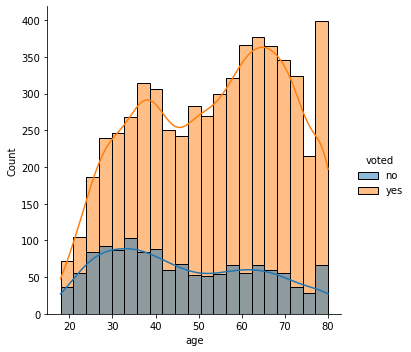

In [34]:
sns.displot(data=voting, x="age", hue="voted", kde=True)

There seem to be some differences in the ages of the people who vote/do not vote. Older people are more likely to vote compared to the young people. 
Now, let us use logistic regression to fit the data, so we can predict a person's probability of voting given their age. 

First, we are going to split the data into training and testing sets, to avoid overfitting. 

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(voting.age, voting.voted, test_size=0.25, random_state=0)
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

Now, we can perform a logistic regression using the inbuilt logistic regression function. We will only use the training data to estimate the parameters.

In [55]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(class_weight="balanced")
logisticRegr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

We can now use this model to predict if a person voted in the test data, and then compute the accuracy of our predictions.

In [56]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.5838926174496645


We can also generate a confusion matrix - our inaccuracy in predictions to see how we are doing. 

[[207 149]
 [595 837]]


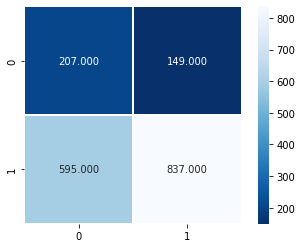

In [57]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm) 
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

# MNIST dataset
This was a simple example with only one predictor, and two labels. If you want to play with a more complicated dataset, use the MNIST data built into sklearn. Start by loading the data.

In [58]:
from sklearn.datasets import load_digits
digits = load_digits()

Let us plot and see some of the images.

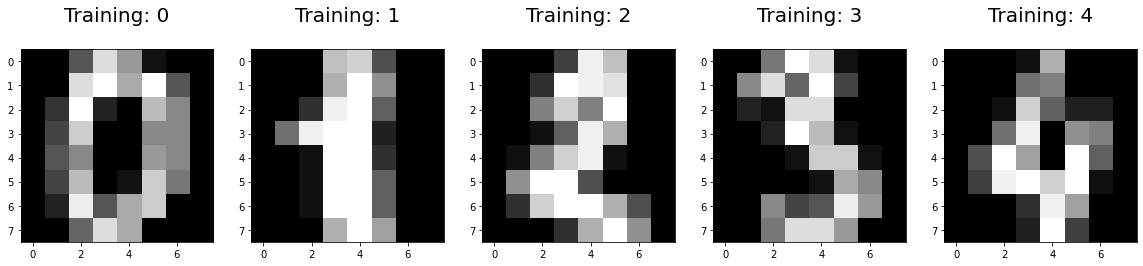

In [60]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

Now use the same techniques as the previous example to see how logistic regression works to classify the data here. 